<a href="https://colab.research.google.com/github/qununc/financials_repo/blob/main/stock_download_yahoo_for_KR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dependencies

In [1]:
# Import libraries
import requests
import sys
import wget
import pickle
# from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import time
import io
import tqdm.notebook as tq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import json

pd.options.mode.chained_assignment = None

# Выгрузка === obsolete

In [11]:
opmed_ticker_list = requests.get(
    "https://raw.githubusercontent.com/qununc/financials_repo/main/data/opmed_ticker_list.json"
).json()

In [12]:
opmed_ticker_list[-5:]

['ZWS', 'ZY', 'ZYME', 'ZYNE', 'ZYXI']

In [9]:
# Input Start and End Date
start = datetime.datetime(2008,1,1)
end = datetime.datetime(2022,5,1)

In [ ]:
# Symbols = ['^GSPC']

In [ ]:
aapl_yf = yf.Ticker('AAPL')
aapl_yf.info['industry']

In [ ]:
aapl_yf.info['sector']

In [ ]:
snp500_values = yf.download('ACC', interval='3mo', start=start, end=end, progress=False, show_errors=False)\
    .loc[:, ['Adj Close', 'Volume']]\
    .dropna(axis=0)\
    .query("index.dt.month in [4]")

In [ ]:
snp500_values

In [ ]:
def yf_stock_3m_download(ticker_name):
    return yf.download(ticker_name, interval='3mo', start=start, end=end, progress=False, show_errors=False)\
    .loc[:, ['Adj Close', 'Volume']]\
    .dropna(axis=0)\
    .query("index.dt.month in [4]")

Symbols = opmed_ticker_list

t0 = time.time()

# create empty dataframe
stock_final = pd.DataFrame()

# iterate over each symbol
for i in tq.tqdm(Symbols):  
    
    # print the symbol which is being downloaded
    # print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf_stock_3m_download(i)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None
        
t1 = time.time()

total = t1-t0

In [ ]:
stock_final.head()

In [ ]:
stock_final.info()

In [ ]:
# stock_final['Volume'] = stock_final['Volume'].astype(np.uint32)
stock_final['Name'] = stock_final['Name'].astype('category')
stock_final = stock_final.dropna().reset_index()
stock_final.to_csv('stock_final_2012-2022.csv.xz', compression='xz', index = False)

In [ ]:
stock_final.info()

# Предобработка

In [ ]:
# import pandas as pds
# import numpy as np
stock_final = pd.read_csv('https://github.com/qununc/financials_repo/raw/main/KR/stock_final_2012-2022.csv.xz')
stock_final['Volume'] = stock_final['Volume'].astype(np.uint64)
stock_final['Name'] = stock_final['Name'].astype('category')
stock_final = stock_final.set_index('Date')
stock_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38562 entries, 2008-04-01 to 2022-04-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Adj Close  38562 non-null  float64 
 1   Volume     38562 non-null  uint64  
 2   Name       38562 non-null  category
dtypes: category(1), float64(1), uint64(1)
memory usage: 1.0+ MB


In [ ]:
stock_final.Name.unique()

['A', 'AA', 'AACG', 'AAIC', 'AAL', ..., 'ZVIA', 'ZVO', 'ZY', 'ZYME', 'ZYXI']
Length: 3079
Categories (3079, object): ['A', 'AA', 'AACG', 'AAIC', ..., 'ZVO', 'ZY', 'ZYME', 'ZYXI']

In [ ]:
stock_final.head(4)

,Adj Close,Volume,Name
Date,,,
2008-04-01,23.166740,239250504,A
2009-04-01,13.239071,279708765,A
2010-04-01,18.532087,332727075,A
2011-04-01,33.316044,308369858,A


In [ ]:
stock_final[stock_final['Volume'] > 3 * 10 ** 6] \
    .sort_values('Adj Close', ascending=False) \
    .loc[:, 'Name'] \
    .unique() \

['AMZN', 'GOOG', 'GOOGL', 'BKNG', 'NBR', ..., 'EXN', 'JOB', 'SYN', 'EVO', 'CELP']
Length: 2905
Categories (3079, object): ['A', 'AA', 'AACG', 'AAIC', ..., 'ZVO', 'ZY', 'ZYME', 'ZYXI']

In [ ]:
stock_result = stock_final[stock_final['Volume'] > 3 * 10 ** 6].drop(['Volume'], axis=1).reset_index()
stock_result.rename({'Adj Close' : 'adj_close'}, axis=1, inplace=True)
# stock_result['adj_close'] = stock_result['adj_close'].round(2)
stock_result['Date'] = pd.to_datetime(stock_result['Date'], infer_datetime_format=True)

In [ ]:
stock_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29786 entries, 0 to 29785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       29786 non-null  datetime64[ns]
 1   adj_close  29786 non-null  float64       
 2   Name       29786 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 612.3 KB


In [ ]:
stock_result.tail(3)

,Date,adj_close,Name
29783,2020-04-01,22.609091,ZYXI
29784,2021-04-01,14.118182,ZYXI
29785,2022-04-01,6.370000,ZYXI


In [ ]:
stock_result = stock_result.drop_duplicates(ignore_index=True)
stocks_pivoted = stock_result.pivot_table(index='Name', columns='Date', values='adj_close', aggfunc='mean')
stocks_pivoted = stocks_pivoted.dropna(axis=0, thresh=3) # drop rows with  less then 3 points of data
stocks_pivoted.head()

Date,2008-04-01,2009-04-01,2010-04-01,2011-04-01,2012-04-01,2013-04-01,2014-04-01,2015-04-01,2016-04-01,2017-04-01,2018-04-01,2019-04-01,2020-04-01,2021-04-01,2022-04-01
Name,,,,,,,,,,,,,,,
A,23.166740,13.239071,18.532087,33.316044,25.636250,28.232319,38.206318,36.305489,42.085457,57.026402,59.846397,72.932610,87.272156,146.784302,119.083038
AA,74.858009,22.716898,22.342682,35.542171,19.800377,17.939407,34.601208,26.110579,21.987661,32.542919,46.726246,23.333220,11.203135,36.719173,67.800003
AACG,NaN,0.712225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,1.260000,3.080000,NaN
AAIC,7.232046,1.832119,4.629126,8.469669,6.706148,9.596067,11.192897,9.143547,6.932003,8.668079,7.776839,6.146327,2.970000,4.060000,NaN
AAL,2.356854,2.290862,8.117003,8.399826,12.566744,15.479815,40.500172,37.919956,27.128143,48.734039,37.069473,32.178577,13.070000,21.209999,18.770000


In [ ]:
# stocks_pivoted.isna().sum(axis=1).sort_values().loc['AMD']

0

In [ ]:
stocks_pivoted.isna().sum(axis=1).sort_values()[:-8:-1]

Name
KOSS    12
MLR     12
MSGE    12
VIST    12
VISL    12
VIRX    12
MREO    12
dtype: int64

In [ ]:
stock_returned = stocks_pivoted.copy() \
    .pct_change(axis=1) \
    .drop(['2008-04-01'], axis=1) \
    .T
stock_returned = stock_returned[stock_returned != 0].drop(['VHC', 'BPT', 'PBT', 'SJT'], axis=1)
stock_returned.head(3)

Name,A,AA,AACG,AAIC,AAL,AAON,AAP,AAPL,AAT,AAU,...,ZIVO,ZM,ZNH,ZSAN,ZTO,ZUMZ,ZUO,ZVO,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2009-04-01,-0.428531,-0.696534,NaN,-0.746667,-0.028000,0.050438,0.075388,-0.149367,NaN,-0.655556,...,0.052632,NaN,0.059626,NaN,NaN,-0.516888,NaN,NaN,NaN,NaN
2010-04-01,0.399803,-0.016473,NaN,1.526651,2.543210,0.191555,0.216402,0.765990,NaN,0.451613,...,0.275000,NaN,NaN,NaN,NaN,1.011236,NaN,NaN,NaN,-0.658823
2011-04-01,0.797749,0.590775,NaN,0.829648,0.034843,0.426458,0.170317,0.334513,NaN,2.677778,...,-0.725490,NaN,0.934192,NaN,NaN,0.549969,NaN,NaN,NaN,NaN


# Формирование портфелей по OPM

In [ ]:
filtered_opm_df = pd.read_csv('https://github.com/qununc/financials_repo/raw/main/KR/filtered_opm_df.csv.gz').drop(['2021'], axis=1)
filtered_opm_df = filtered_opm_df \
    .set_index(['ticker']) \
    .iloc[:, ::-1] \
    .loc[stocks_pivoted.index] \
    .dropna(how='all') \
    .drop_duplicates() 

filtered_opm_df.columns = [str(int(year_k) + 1) for year_k in filtered_opm_df.columns]
filtered_opm_df = filtered_opm_df.drop(
        filtered_opm_df[filtered_opm_df == 100].dropna(how='all').index
    )
filtered_opm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2156 entries, A to ZYXI
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    1433 non-null   float64
 1   2011    1652 non-null   float64
 2   2012    1709 non-null   float64
 3   2013    1707 non-null   float64
 4   2014    1713 non-null   float64
 5   2015    1731 non-null   float64
 6   2016    1650 non-null   float64
 7   2017    1666 non-null   float64
 8   2018    1738 non-null   float64
 9   2019    1769 non-null   float64
 10  2020    1729 non-null   float64
 11  2021    1547 non-null   float64
dtypes: float64(12)
memory usage: 219.0+ KB


In [ ]:
filtered_opm_df.index

Index(['A', 'AA', 'AACG', 'AAIC', 'AAL', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAU',
       ...
       'ZD', 'ZEUS', 'ZG', 'ZM', 'ZNH', 'ZSAN', 'ZTO', 'ZUMZ', 'ZVO', 'ZYXI'],
      dtype='object', name='ticker', length=2156)

In [ ]:
filtered_opm_df.head(3)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ticker,,,,,,,,,,,,
A,1.0489,10.3968,16.1905,16.3167,9.9127,10.3508,12.9272,14.6359,18.0456,18.3964,18.2258,15.8457
AA,NaN,NaN,NaN,NaN,NaN,2.3123,NaN,0.1717,11.4229,13.5119,NaN,3.5214
AACG,12.6899,25.5588,30.6883,22.1181,27.4126,24.7605,18.7325,12.4022,15.1374,NaN,NaN,NaN


In [ ]:
stock_returned.T.head(3)

Date,2009-04-01,2010-04-01,2011-04-01,2012-04-01,2013-04-01,2014-04-01,2015-04-01,2016-04-01,2017-04-01,2018-04-01,2019-04-01,2020-04-01,2021-04-01,2022-04-01
Name,,,,,,,,,,,,,,
A,-0.428531,0.399803,0.797749,-0.230513,0.101266,0.353283,-0.049752,0.159204,0.355014,0.049451,0.218663,0.196614,0.681914,-0.188721
AA,-0.696534,-0.016473,0.590775,-0.442905,-0.093987,0.928782,-0.245385,-0.157902,0.480054,0.435834,-0.500640,-0.519863,2.277580,0.846447
AACG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790937,-0.533333,1.444444,NaN


In [ ]:
portf_dict = {key: None for key in filtered_opm_df.columns}
for year, data_series in filtered_opm_df.iteritems():
    joined_df = pd.merge(
        filtered_opm_df[year],
        stock_returned.loc[str(int(year) + 1), :].iloc[0],
        left_index=True,
        right_index=True,
    ).dropna(how='any')
    
    joined_df.columns = [
                        f'Op. m. in {joined_df.columns[0]}',
                        f'returns in {str(int(year) + 1)}'
    ]

    joined_df_sorted = joined_df.sort_values(
        by=joined_df.columns[0]
    )

    result_of_join = joined_df_sorted.drop(
        joined_df_sorted.index[6:-6]
    )
    result_of_join.index.name = 'ticker'
    portf_dict[year] = result_of_join

In [ ]:
portf_dict['2010']

,Op. m. in 2010,returns in 2011
ticker,,
SCS,0.0314,0.507405
SNEX,0.0488,0.513125
NTP,0.0980,0.361629
VLO,0.1285,0.436075
RAD,0.1913,0.357143
ITGR,0.2008,0.202152
RNR,83.0989,0.264149
FOR,85.5119,-0.085189
GBDC,90.0624,0.118182


In [ ]:
portf_dict['2020'].iloc[6:, 1].median(), portf_dict['2020'].iloc[6:, 1].mean()

(0.30233973311433726, 0.3793933801179989)

In [ ]:
pd.concat(
    (portf.reset_index() for year, portf in portf_dict.items()),
    axis=1,
    ).to_excel('portfolios_2009-2021.xlsx')

In [ ]:
# Input Start and End Date
start = datetime.datetime(2008,1,1)
end = datetime.datetime(2022,5,1)

snp500_values = yf.download('^GSPC', interval='3mo', start=start, end=end, progress=False, show_errors=False)\
    .loc[:, ['Adj Close']]\
    .dropna(axis=0)\
    .query("index.dt.month in [4]")

snp500_values['Adj Close'].pct_change().loc['2009']

Date
2009-04-01   -0.281781
Name: Adj Close, dtype: float64

In [ ]:
results_df = pd.DataFrame(
    index=pd.Index(
        ['P1 ~ Min Op. Margin Mean Returns', 'P2 ~ Max Op. Margin Mean Returns', 'S&P 500 YoY Returns'],
        name=None
        )
    )
for year, portf in portf_dict.items():
    results_df[year] = [
                        portf.iloc[:6, 1].mean(),
                        portf.iloc[6:, 1].mean(),
                        snp500_values['Adj Close'].pct_change().loc[str(int(year) + 1)][0]
    ]
results_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
P1 ~ Min Op. Margin Mean Returns,0.396255,0.085604,0.352500,0.300684,0.671239,-0.036486,0.410026,0.198656,-0.215072,-0.261825,0.883081,-0.513941
P2 ~ Max Op. Margin Mean Returns,0.442627,0.140111,-0.124894,0.134850,-0.085298,0.021578,0.474497,0.185638,0.092972,-0.214858,0.379393,-0.237378
S&P 500 YoY Returns,0.281292,0.031439,0.179215,0.220354,0.052484,0.017328,0.154631,0.121713,0.082178,0.053890,0.386161,-0.038527


In [ ]:
(results_df.iloc[0] - results_df.iloc[1]) < 0

2010     True
2011     True
2012    False
2013    False
2014    False
2015     True
2016     True
2017    False
2018     True
2019     True
2020    False
2021     True
dtype: bool

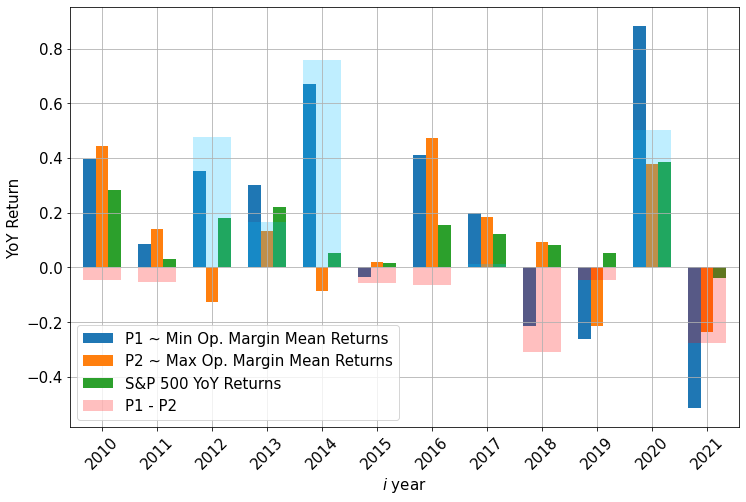

In [ ]:
plt.rcParams['font.size'] = '15'

results_df.T.plot(
    kind='bar', 
    figsize=(12, 8), 
    xlabel=r'$i$ year', 
    ylabel='YoY Return',
    width=0.68,
)

(results_df.iloc[0] - results_df.iloc[1]).plot(
    kind='bar',
    secondary_y=False, 
    color=np.where((results_df.iloc[0] - results_df.iloc[1]) < 0, 'red', 'deepskyblue'), 
    grid=True, 
    label='P1 - P2',
    alpha=0.25,
    width=0.68,
)

plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.subplots_adjust(bottom=0.15)
plt.savefig('portf_plot.png', dpi=500)
# plt.savefig('portf_plot.svg')

In [ ]:
portf_dict['2021']

,Op. m. in 2021,returns in 2022
ticker,,
SPI,0.0656,-0.700599
PRTS,0.0665,-0.705796
ODP,0.0676,-0.103728
TRIB,0.0804,-0.595238
ARGO,0.0847,-0.154123
RDFN,0.0894,-0.824160
BBDC,91.7751,0.042928
HRZN,94.0697,-0.245591
INVA,95.3470,0.272185
